In [22]:
import numpy as np 
import pandas as pd
import sklearn

In [11]:
df_org = pd.read_csv("heart.csv")
df_org.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [12]:
df_org.shape

(918, 12)

In [13]:
df_org.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [14]:
df = df_org

In [25]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

# สร้าง object ของ LabelEncoder สำหรับคอลัมน์ Sex
Sex_encoder = LabelEncoder()

# สร้าง object ของ LabelEncoder สำหรับคอลัมน์ ChestPainType
ChestPainType_encoder = LabelEncoder()

# สร้าง object ของ LabelEncoder สำหรับคอลัมน์ RestingECG
RestingECG_encoder = LabelEncoder()

# สร้าง object ของ LabelEncoder สำหรับคอลัมน์ ExerciseAngina
ExerciseAngina_encoder = LabelEncoder()

# สร้าง object ของ LabelEncoder สำหรับคอลัมน์ ST_Slope
ST_Slope_encoder = LabelEncoder()


In [31]:
df['Sex'] = Sex_encoder.fit_transform(df['Sex'])
df['ChestPainType'] = ChestPainType_encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = RestingECG_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = ExerciseAngina_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = ST_Slope_encoder.fit_transform(df['ST_Slope'])

In [32]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [36]:
import pickle

print(Sex_encoder.classes_)
print(ChestPainType_encoder.classes_)
print(RestingECG_encoder.classes_)
print(ExerciseAngina_encoder.classes_)
print(ST_Slope_encoder.classes_)

# save encoder objects
pickle.dump(Sex_encoder, open('encoder.Sex.sav', 'wb'))
pickle.dump(ChestPainType_encoder, open('encoder.ChestPainType.sav', 'wb'))
pickle.dump(RestingECG_encoder, open('encoder.RestingECG.sav', 'wb'))
pickle.dump(ExerciseAngina_encoder, open('encoder.ExerciseAngina.sav', 'wb'))
pickle.dump(ST_Slope_encoder, open('encoder.ST_Slope.sav', 'wb'))

[0 1]
[0 1 2 3]
[0 1 2]
[0 1]
[0 1 2]


In [41]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

evaluations = pd.DataFrame(columns=['Accuracy', 'F1', 'Precision', 'Recall'], 
                           index=['Decision Trees', 'Random Forest', 'KNN', 'AdaBoost', 'XGBoost'])

Summary Evaluation: 
               precision    recall  f1-score   support

           0     0.7738    0.8025    0.7879        81
           1     0.8400    0.8155    0.8276       103

    accuracy                         0.8098       184
   macro avg     0.8069    0.8090    0.8077       184
weighted avg     0.8109    0.8098    0.8101       184

               Accuracy     F1 Precision Recall
Decision Trees    80.98  81.01     81.09  80.98
Random Forest       NaN    NaN       NaN    NaN
KNN                 NaN    NaN       NaN    NaN
AdaBoost            NaN    NaN       NaN    NaN
XGBoost             NaN    NaN       NaN    NaN


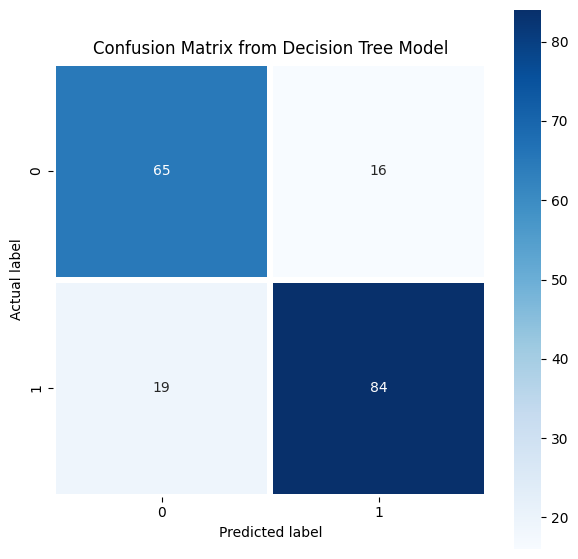

In [53]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

summary_eval = classification_report(y_test, y_pred, digits=4)

print("Summary Evaluation: \n", summary_eval)

acc = round(accuracy_score(y_test, y_pred) * 100, 2)
f1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
pre = round(precision_score(y_test, y_pred, average='weighted') * 100, 2)
rec = round(recall_score(y_test, y_pred, average='weighted') * 100, 2)

evaluations.loc['Decision Trees'] = [acc, f1, pre, rec]
print(evaluations)

cfm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(data=cfm, linewidth=3, annot=True, square=True, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix from Decision Tree Model")
plt.show()

Summary Evaluation: 
               precision    recall  f1-score   support

           0     0.8767    0.7901    0.8312        81
           1     0.8468    0.9126    0.8785       103

    accuracy                         0.8587       184
   macro avg     0.8618    0.8514    0.8548       184
weighted avg     0.8600    0.8587    0.8577       184

               Accuracy     F1 Precision Recall
Decision Trees    80.98  81.01     81.09  80.98
Random Forest     85.87  85.77      86.0  85.87
KNN                 NaN    NaN       NaN    NaN
AdaBoost            NaN    NaN       NaN    NaN
XGBoost             NaN    NaN       NaN    NaN


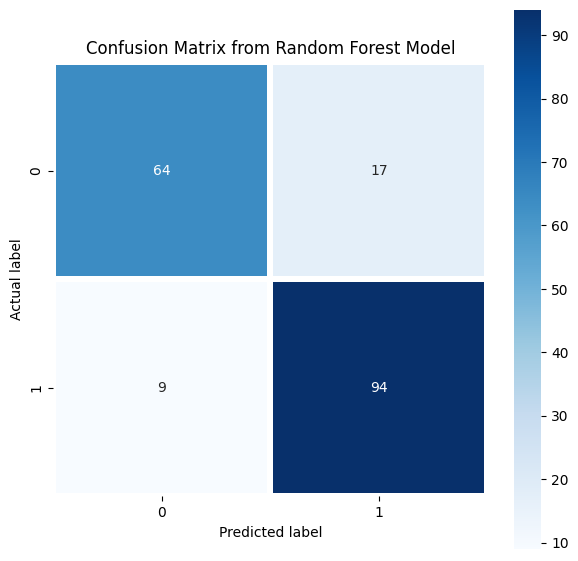

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=0)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

summary_eval = classification_report(y_test, y_pred, digits=4)

print("Summary Evaluation: \n", summary_eval)

acc = round(accuracy_score(y_test, y_pred)*100, 2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100, 2)
pre = round(precision_score(y_test, y_pred, average='weighted')*100, 2)
rec = round(recall_score(y_test, y_pred, average='weighted')*100, 2)

evaluations.loc['Random Forest'] = [acc, f1, pre, rec]
print(evaluations)

cfm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(data=cfm, linewidth=3, annot=True, square=True, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix from Random Forest Model")
plt.show()


Summary Evaluation: 
               precision    recall  f1-score   support

           0     0.6835    0.6667    0.6750        81
           1     0.7429    0.7573    0.7500       103

    accuracy                         0.7174       184
   macro avg     0.7132    0.7120    0.7125       184
weighted avg     0.7167    0.7174    0.7170       184

               Accuracy     F1 Precision Recall
Decision Trees    80.98  81.01     81.09  80.98
Random Forest     85.87  85.77      86.0  85.87
KNN               71.74   71.7     71.67  71.74
AdaBoost            NaN    NaN       NaN    NaN
XGBoost             NaN    NaN       NaN    NaN


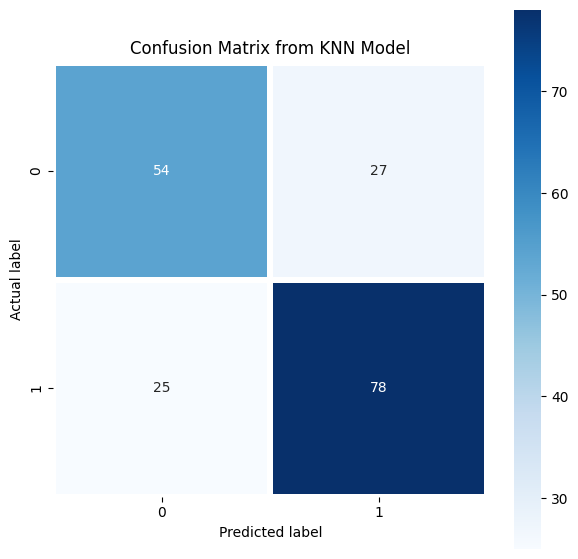

In [55]:
from sklearn.neighbors import KNeighborsClassifier

k = 5  # number of neighbors to consider
knn_classifier = KNeighborsClassifier(n_neighbors=k)

knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

summary_eval = classification_report(y_test, y_pred, digits=4)
print("Summary Evaluation: \n", summary_eval)

acc = round(accuracy_score(y_test, y_pred) * 100, 2)
f1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
pre = round(precision_score(y_test, y_pred, average='weighted') * 100, 2)
rec = round(recall_score(y_test, y_pred, average='weighted') * 100, 2)

evaluations.loc['KNN'] = [acc, f1, pre, rec]
print(evaluations)

cfm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(data=cfm, linewidth=3, annot=True, square=True, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix from KNN Model")
plt.show()


Summary Evaluation: 
               precision    recall  f1-score   support

           0     0.8630    0.7778    0.8182        81
           1     0.8378    0.9029    0.8692       103

    accuracy                         0.8478       184
   macro avg     0.8504    0.8403    0.8437       184
weighted avg     0.8489    0.8478    0.8467       184

               Accuracy     F1 Precision Recall
Decision Trees    80.98  81.01     81.09  80.98
Random Forest     85.87  85.77      86.0  85.87
KNN               71.74   71.7     71.67  71.74
AdaBoost          84.78  84.67     84.89  84.78
XGBoost             NaN    NaN       NaN    NaN


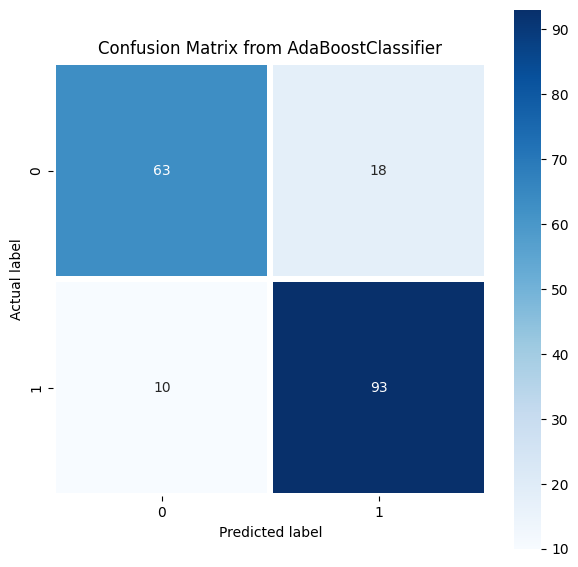

In [56]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(n_estimators=100)

ada_classifier.fit(X_train, y_train)
y_pred = ada_classifier.predict(X_test)

summary_eval = classification_report(y_test, y_pred, digits=4)
print("Summary Evaluation: \n", summary_eval)

acc = round(accuracy_score(y_test, y_pred)*100, 2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100, 2)
pre = round(precision_score(y_test, y_pred, average='weighted')*100, 2)
rec = round(recall_score(y_test, y_pred, average='weighted')*100, 2)

evaluations.loc['AdaBoost'] = [acc, f1, pre, rec]
print(evaluations)

cfm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cfm, linewidth=3, annot=True, square=True, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix from AdaBoostClassifier")
plt.show()


Summary Evaluation: 
               precision    recall  f1-score   support

           0     0.8267    0.7654    0.7949        81
           1     0.8257    0.8738    0.8491       103

    accuracy                         0.8261       184
   macro avg     0.8262    0.8196    0.8220       184
weighted avg     0.8261    0.8261    0.8252       184

               Accuracy     F1 Precision Recall
Decision Trees    80.98  81.01     81.09  80.98
Random Forest     85.87  85.77      86.0  85.87
KNN               71.74   71.7     71.67  71.74
AdaBoost          84.78  84.67     84.89  84.78
XGBoost           82.61  82.52     82.61  82.61


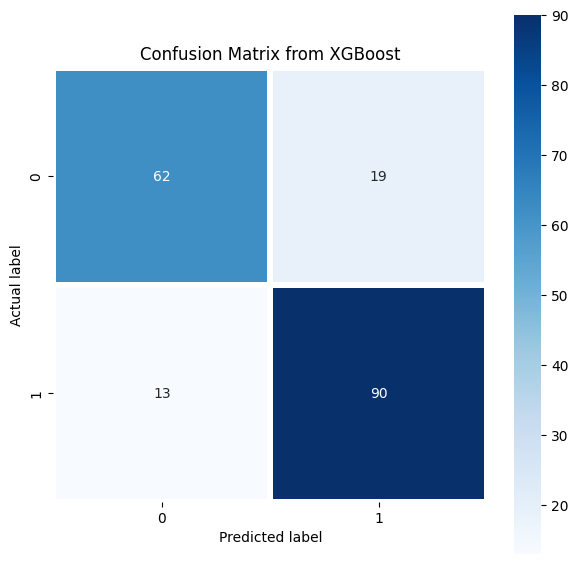

In [60]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)

summary_eval = classification_report(y_test, y_pred, digits=4)

print("Summary Evaluation: \n", summary_eval)

acc = round(accuracy_score(y_test, y_pred) * 100, 2)
f1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
pre = round(precision_score(y_test, y_pred, average='weighted') * 100, 2)
rec = round(recall_score(y_test, y_pred, average='weighted') * 100, 2)

evaluations.loc['XGBoost'] = [acc, f1, pre, rec]
print(evaluations)

cfm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(data=cfm, linewidth=3, annot=True, square=True, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix from XGBoost")
plt.show()

In [61]:
import pickle
pickle.dump(evaluations, open('evals.all.sav', 'wb'))

In [ ]:
#16 เลือก Random Forest เพราะมี F1 Score สูงที่สุด = 85.77      

In [62]:
import pickle
from sklearn.ensemble import AdaBoostClassifier

model = RandomForestClassifier()
model.fit(X,y)

pickle.dump(model, open('model.heart.sav', 'wb'))

In [64]:
%%writefile app_main_358.py

import streamlit as st 
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

model = pickle.load(open('model.heart.sav', 'rb'))

Sex_encoder = pickle.load(open('encoder.Sex.sav', 'rb'))
ChestPainType_encoder = pickle.load(open('encoder.ChestPainType.sav', 'rb'))
RestingECG_encoder = pickle.load(open('encoder.RestingECG.sav', 'rb'))
ExerciseAngina_encoder = pickle.load(open('encoder.ExerciseAngina.sav', 'rb'))
ST_Slope_encoder = pickle.load(open('encoder.ST_Slope.sav', 'rb'))

evaluations = pickle.load(open('evals.all.sav', 'rb'))

st.title('Heart Disease Prediction')

tab1, tab2 = st.tabs(["Prediction", "Model Evaluations"])

with tab1:
    x1 = st.slider('Age', 0, 100, 30)
    x2 = st.radio('Select Sex', Sex_encoder.classes_)
    x2 = Sex_encoder.transform([x2])[0]
    x3 = st.radio('Select ChestPainType', ChestPainType_encoder.classes_)
    x3 = ChestPainType_encoder.transform([x3])[0]
    x4 = st.slider('RestingBP', 0, 210, 130)
    x5 = st.slider('Cholesterol', 0, 700, 180)
    x6 = st.slider('FastingBS', 0, 1, 0)
    x7 = st.radio('Select RestingECG', RestingECG_encoder.classes_)
    x7 = RestingECG_encoder.transform([x7])[0]
    x8 = st.slider('MaxHR', 0, 250, 120)
    x9 = st.radio('Select ExerciseAngina', ExerciseAngina_encoder.classes_)
    x9 = ExerciseAngina_encoder.transform([x9])[0]
    x10 = st.slider('Oldpeak', 0.0, 10.0, 2.0, step=0.1)
    x11 = st.radio('Select ST_Slope', ST_Slope_encoder.classes_)
    x11 = ST_Slope_encoder.transform([x11])[0]

    x_new = pd.DataFrame(data=np.array([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11]).reshape(1,-1), 
                 columns=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
                           'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])

    pred = model.predict(x_new)

    st.header('Predicted Result:')

    if pred == 0: 
        st.subheader('Normal')
    else:
        st.subheader('Heart Disease')

with tab2:
    import plotly.graph_objects as px
    
    x = evaluations.columns
    fig = px.Figure(data=[
        px.Bar(name='Decision Tree', x=x, y=evaluations.loc['Decision Tress']),
        px.Bar(name='Random Forest', x=x, y=evaluations.loc['Random Forest']),
        px.Bar(name='XGBoost', x=x, y=evaluations.loc['XGBoost'])
    ])
    st.plotly_chart(fig, use_container_width=True)

    st.dataframe(evaluations)

    

Writing app_main_358.py
